In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


import sys
sys.path.insert(0, os.path.join(os.path.abspath(os.pardir), "src"))

from utils import * # Utility functions and variables
from data_gen import get_train_features, plot_spectrogram_feature, plot_mfcc_feature

# Train protocol

In [2]:
train_prot = pd.read_csv(train_protocol, sep=' ', names = protocol_header)
train_prot['wav_path'] = train_prot.wav_id.apply(lambda i: os.path.join(train_path, i))
train_prot['transcript'] = train_prot.phrase_id.apply(lambda i: phrase_ids[i])
train_prot['bin_label'] =  train_prot.label.apply(lambda i: 1 if i == "spoof" else 0)
train_prot.head()

,wav_id,label,speaker_id,phrase_id,env_id,pb_device_id,rec_device_id,wav_path,transcript,bin_label
0,T_1000001.wav,genuine,M0002,S05,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,Birthday parties have cupcakes and ice cream,0
1,T_1000002.wav,genuine,M0002,S09,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,Jealousy has twenty-twenty vision,0
2,T_1000003.wav,genuine,M0002,S01,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,My voice is my password,0
3,T_1000004.wav,genuine,M0002,S10,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,Necessity is the mother of invention,0
4,T_1000005.wav,genuine,M0002,S04,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,Artificial intelligence is for real,0


# Get duration

In [3]:
import wave
import contextlib

def get_duration(fname):

    with contextlib.closing(wave.open(fname, 'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration

In [4]:
train_prot['duration'] = train_prot.wav_path.apply(get_duration)
train_prot.head()

,wav_id,label,speaker_id,phrase_id,env_id,pb_device_id,rec_device_id,wav_path,transcript,bin_label,duration
0,T_1000001.wav,genuine,M0002,S05,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,Birthday parties have cupcakes and ice cream,0,2.4215
1,T_1000002.wav,genuine,M0002,S09,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,Jealousy has twenty-twenty vision,0,1.7495
2,T_1000003.wav,genuine,M0002,S01,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,My voice is my password,0,1.5135
3,T_1000004.wav,genuine,M0002,S10,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,Necessity is the mother of invention,0,1.7495
4,T_1000005.wav,genuine,M0002,S04,-,-,-,/home/cc/replay_attack/data/asvspoof2017/ASVsp...,Artificial intelligence is for real,0,1.6895


In [5]:
train_prot.shape

(3014, 11)

# Visualize normalized Spectogram & MFCC features

In [6]:
from IPython.display import Markdown, display
from IPython.display import Audio

def visualize(vis_raw_audio, audio_path, transcript, sample_spectogram=None, sample_mfcc=None, sample_cqt=None):
    """Plot audio signal, features, play audio.."""
    
    # plot audio signal
    plot_raw_audio(vis_raw_audio)

    # print length of audio signal
    display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))

    # print transcript corresponding to audio clip
    display(Markdown('**Transcript** : ' + str(transcript)))
    
    if sample_spectogram is not None:
        # plot normalized spectrogram
        plot_spectrogram_feature(sample_spectogram)
        # print shape of spectrogram
        display(Markdown('**Shape of Spectrogram** : ' + str(sample_spectogram.shape)))
    
    if sample_mfcc is not None:
        # plot normalized MFCC
        plot_mfcc_feature(sample_mfcc)
        # print shape of MFCC
        display(Markdown('**Shape of MFCC** : ' + str(sample_mfcc.shape)))
#TODO  
#     if sample_cqt is not None:
#         # plot normalized MFCC
#         plot_mfcc_feature(sample_mfcc)
#         # print shape of MFCC
#         display(Markdown('**Shape of MFCC** : ' + str(sample_mfcc.shape)))
        
    # play the audio file
    return(Audio(audio_path))

### GENUINE

In [7]:
# extract label and audio features for a single training example

vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = get_train_features(index=900, trim=True)  # S01

There are 3014 total training examples.


In [8]:
vis_mfcc_feature.shape

(322, 13)

In [9]:
vis_spectrogram_feature.shape

(114, 161)

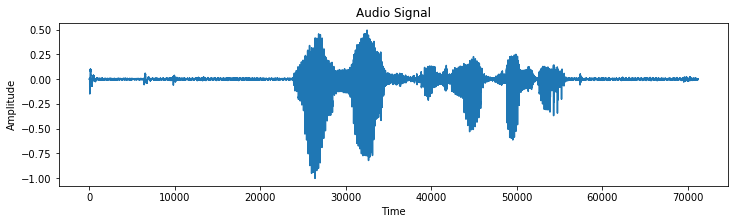

**Shape of Audio Signal** : (71211,)

**Transcript** : My voice is my password

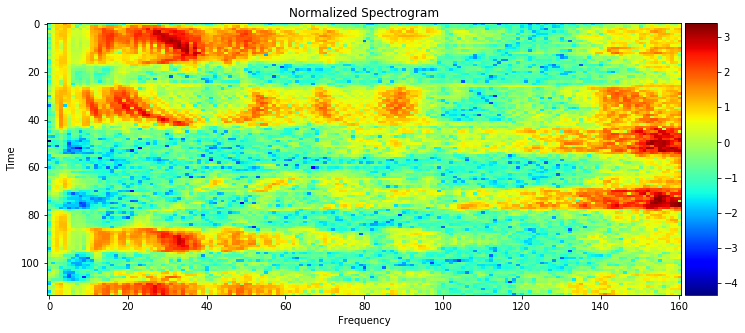

**Shape of Spectrogram** : (114, 161)

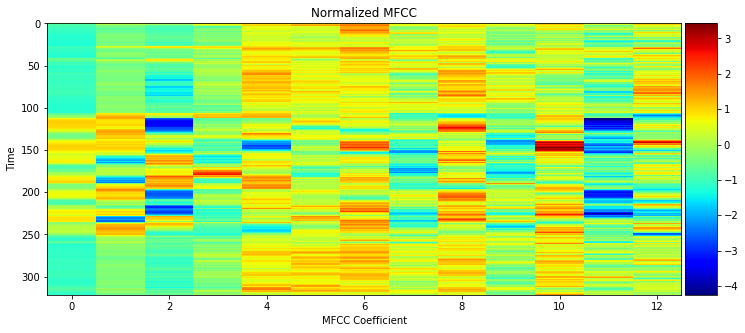

**Shape of MFCC** : (322, 13)

In [10]:
visualize(vis_raw_audio, vis_audio_path, vis_text, vis_spectrogram_feature, vis_mfcc_feature)

### SPOOF

In [11]:
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = get_train_features(index=3009, trim=True) # S01

There are 3014 total training examples.


In [12]:
vis_mfcc_feature.shape

(163, 13)

In [13]:
vis_spectrogram_feature.shape

(117, 161)

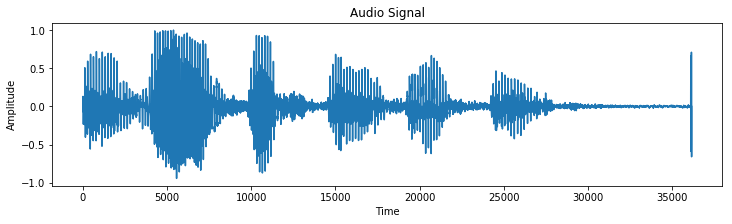

**Shape of Audio Signal** : (36151,)

**Transcript** : My voice is my password

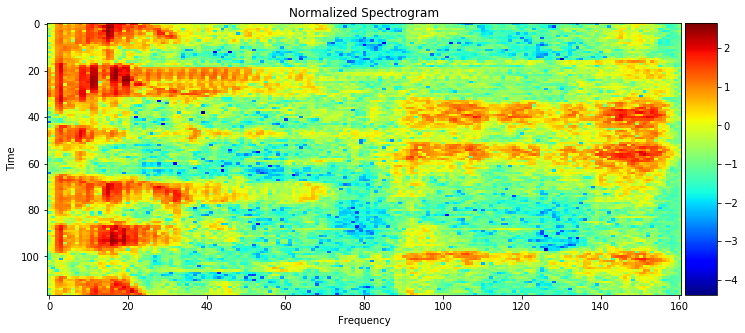

**Shape of Spectrogram** : (117, 161)

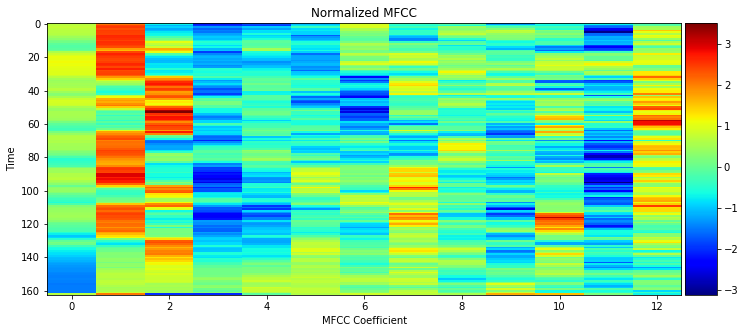

**Shape of MFCC** : (163, 13)

In [14]:
visualize(vis_raw_audio, vis_audio_path, vis_text, vis_spectrogram_feature, vis_mfcc_feature)